In [1]:
!pip install pandas-profiling ipywidgets jupyterlab
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension list


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook qtconsole run script server
troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
  

In [5]:
!pip install jupyter_contrib_nbextensions
!pip install ipywidgets


     ---------------------------------------- 0.0/23.5 MB ? eta -:--:--
     --------------------------------------- 0.0/23.5 MB 640.0 kB/s eta 0:00:37
     ---------------------------------------- 0.1/23.5 MB 1.0 MB/s eta 0:00:23
     ---------------------------------------- 0.3/23.5 MB 2.0 MB/s eta 0:00:12
      --------------------------------------- 0.4/23.5 MB 2.4 MB/s eta 0:00:10
     - -------------------------------------- 0.7/23.5 MB 3.4 MB/s eta 0:00:07
     - -------------------------------------- 1.1/23.5 MB 4.0 MB/s eta 0:00:06
     ---- ----------------------------------- 2.4/23.5 MB 7.8 MB/s eta 0:00:03
     ---- ----------------------------------- 2.4/23.5 MB 7.8 MB/s eta 0:00:03
     ----- ---------------------------------- 3.2/23.5 MB 7.7 MB/s eta 0:00:03
     ----- ---------------------------------- 3.2/23.5 MB 7.7 MB/s eta 0:00:03
     ------- -------------------------------- 4.5/23.5 MB 9.3 MB/s eta 0:00:03
     --------- ------------------------------ 5.5/23.5 MB 

In [7]:
!pip show notebook


Name: notebook
Version: 7.0.8
Summary: Jupyter Notebook - A web-based notebook environment for interactive computing
Home-page: 
Author: 
Author-email: Jupyter Development Team <jupyter@googlegroups.com>
License: BSD 3-Clause License

- Copyright (c) 2001-2015, IPython Development Team
- Copyright (c) 2015-, Jupyter Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software

In [8]:
!pip install notebook==6.5.4

   ---------------------------------------- 0.0/529.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/529.8 kB ? eta -:--:--
   - -------------------------------------- 20.5/529.8 kB ? eta -:--:--
   ---- ---------------------------------- 61.4/529.8 kB 656.4 kB/s eta 0:00:01
   ---- ---------------------------------- 61.4/529.8 kB 656.4 kB/s eta 0:00:01
   ---------- --------------------------- 143.4/529.8 kB 847.9 kB/s eta 0:00:01
   ---------------- --------------------- 225.3/529.8 kB 981.9 kB/s eta 0:00:01
   -------------------- ------------------- 276.5/529.8 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 409.6/529.8 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  522.2/529.8 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 529.8/529.8 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB 8.9 MB/s eta 0:00:02

Data loaded successfully!
First few rows of data:
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00

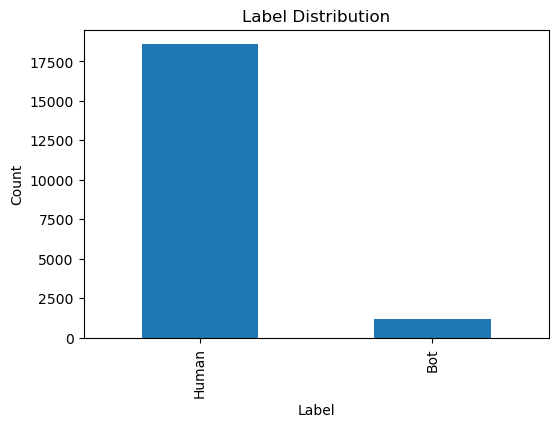

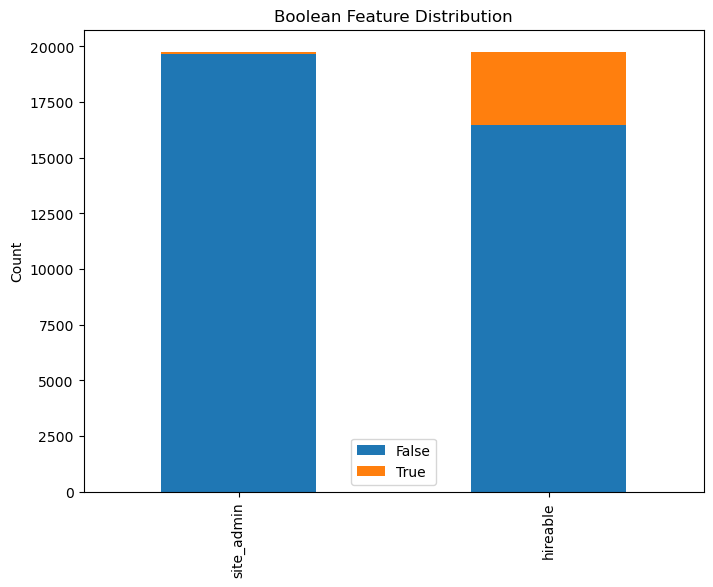

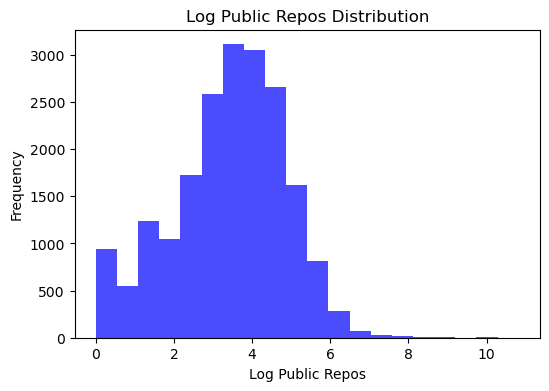

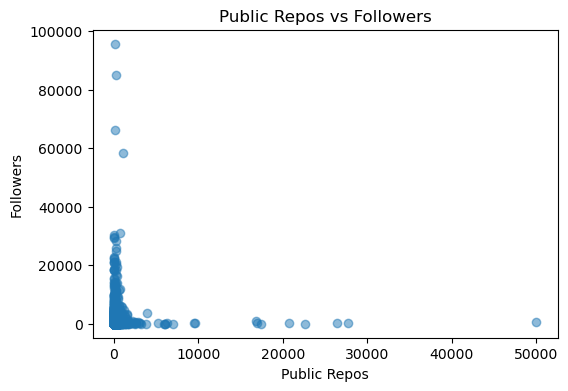

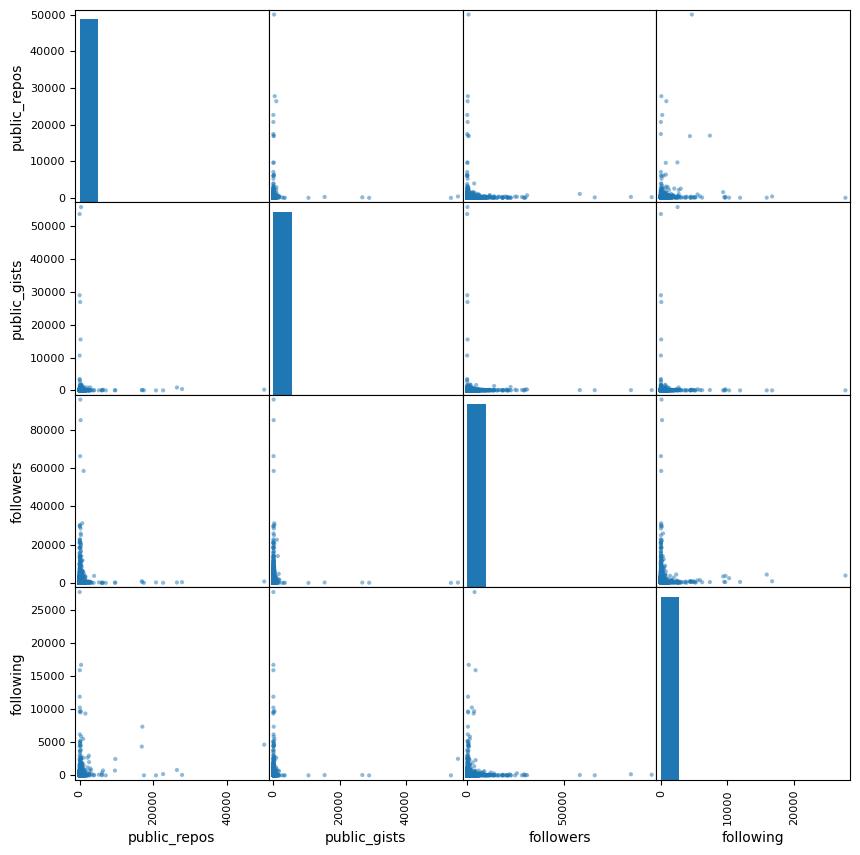

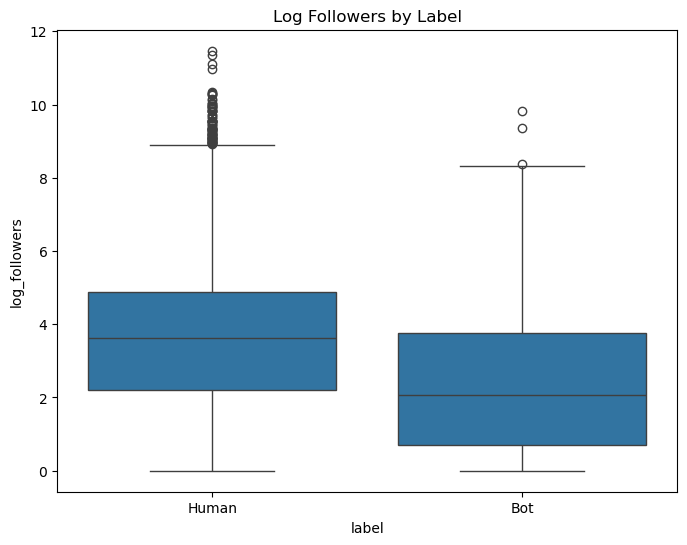

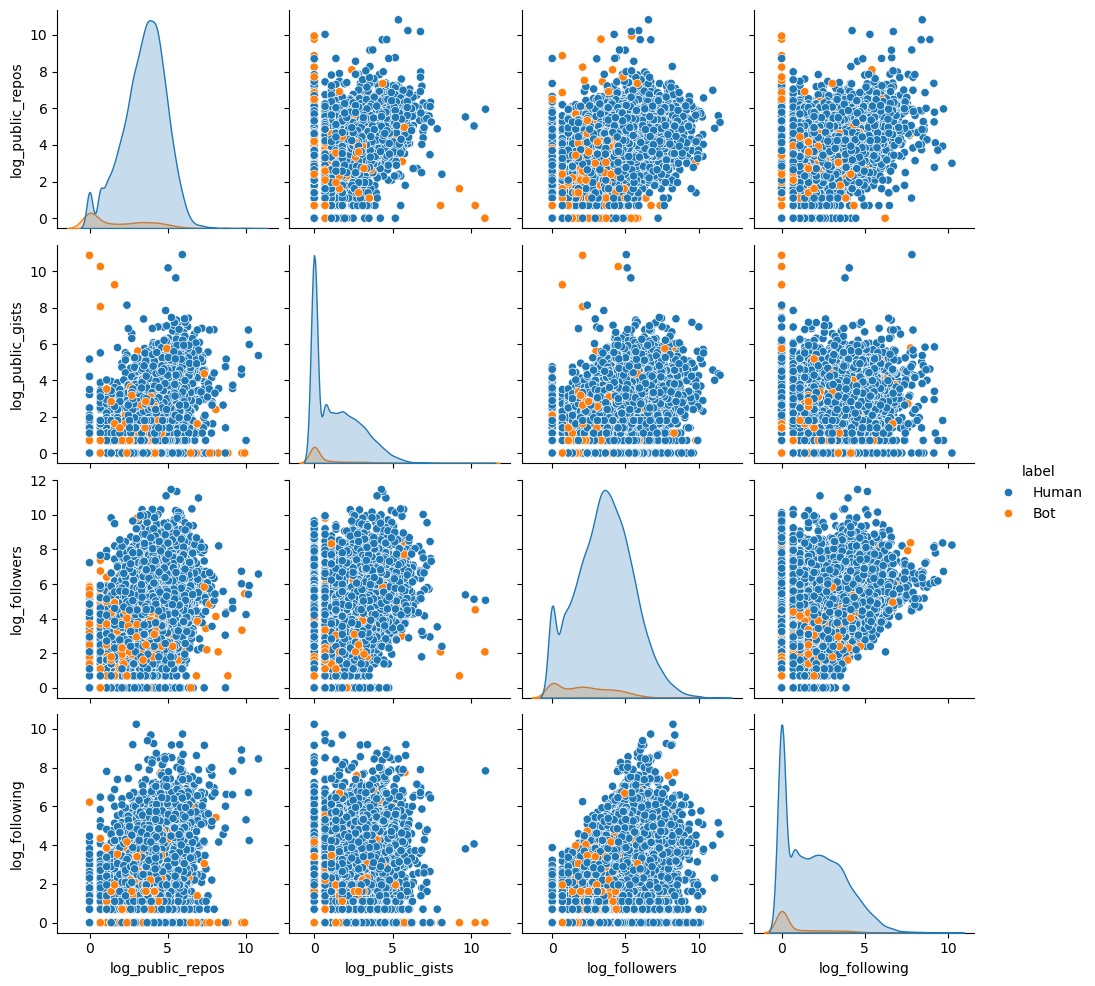

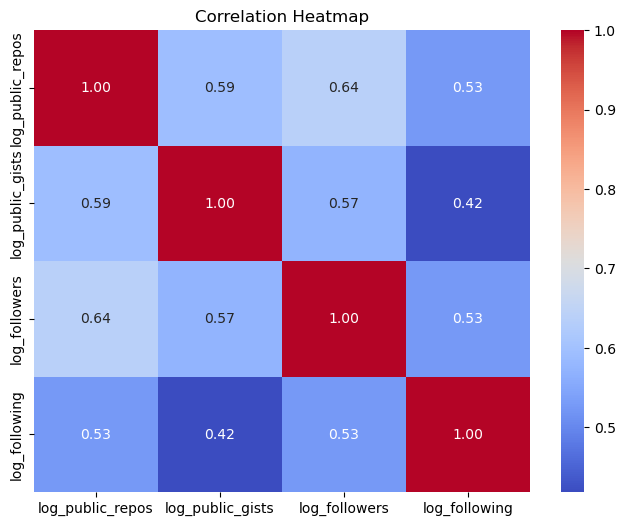

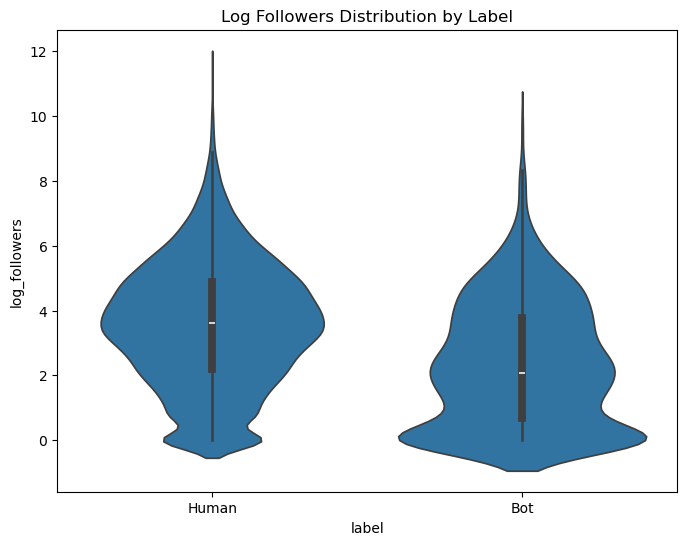

An error occurred while generating the report: module 'numba' has no attribute 'generated_jit'


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = r'C:\Users\86189\Desktop\github_bot_processed_data.csv'

# Load the data
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError as e:
    print(f"File not found: {e}")

# Adjust pandas display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Step 1: Data exploration
# Display first few rows and data information
print("First few rows of data:")
print(data.head())

print("\nData info:")
print(data.info())

# Generate descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Step 2: Data formatting
# Convert 'created_at' and 'updated_at' to datetime if not already
if not np.issubdtype(data['created_at'].dtype, np.datetime64):
    data['created_at'] = pd.to_datetime(data['created_at'])
if not np.issubdtype(data['updated_at'].dtype, np.datetime64):
    data['updated_at'] = pd.to_datetime(data['updated_at'])

# Step 3: Log transformations
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for col in columns_to_transform:
    log_col = f'log_{col}'
    data[log_col] = np.log1p(data[col])  # log1p handles log(0) by doing log(1+x)

print("\nData after log transformations:")
print(data[[f'log_{col}' for col in columns_to_transform]].head())

# Step 4: Visualization using Matplotlib
# 4.1 Bar plot for 'label' distribution
plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar', title='Label Distribution')
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()

# 4.2 Stacked bar chart for boolean features
boolean_features = ['site_admin', 'hireable']
bool_data = data[boolean_features].apply(lambda x: x.value_counts()).T
bool_data.plot(kind='bar', stacked=True, figsize=(8, 6), title='Boolean Feature Distribution')
plt.ylabel('Count')
plt.show()

# 4.3 Histogram for 'log_public_repos'
plt.figure(figsize=(6, 4))
plt.hist(data['log_public_repos'], bins=20, alpha=0.7, color='blue')
plt.title('Log Public Repos Distribution')
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')
plt.show()

# 4.4 Scatter plot: 'public_repos' vs 'followers'
plt.figure(figsize=(6, 4))
plt.scatter(data['public_repos'], data['followers'], alpha=0.5)
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 4.5 Scatter matrix for numeric features
from pandas.plotting import scatter_matrix
numeric_features = ['public_repos', 'public_gists', 'followers', 'following']
scatter_matrix(data[numeric_features], figsize=(10, 10), alpha=0.5)
plt.show()

# Step 5: Visualization using Seaborn
# 5.1 Box plot for 'log_followers' by 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.title('Log Followers by Label')
plt.show()

# 5.2 Pair plot for selected features by 'label'
sns.pairplot(data, vars=[f'log_{col}' for col in columns_to_transform], hue='label', diag_kind='kde')
plt.show()

# 5.3 Heatmap for correlations
plt.figure(figsize=(8, 6))
correlation_matrix = data[[f'log_{col}' for col in columns_to_transform]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 5.4 Violin plot for 'log_followers' by 'label'
plt.figure(figsize=(8, 6))
sns.violinplot(x='label', y='log_followers', data=data)
plt.title('Log Followers Distribution by Label')
plt.show()

# Step 6: Generate interactive profile report (pandas-profiling)
try:
    from pandas_profiling import ProfileReport
    profile = ProfileReport(data, title="GitHub Bot Processed Data Report", explorative=True)
    profile.to_file("github_bot_processed_data_report.html")
    print("Interactive report generated: github_bot_processed_data_report.html")
except ImportError as e:
    print("pandas-profiling not installed. Install it using 'pip install pandas-profiling'.")
except Exception as e:
    print(f"An error occurred while generating the report: {e}")
